In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
X = pd.read_csv("./air_polution/Train.csv")
X_test = pd.read_csv("./air_polution/Test.csv")

In [77]:
X.shape

(1600, 6)

In [78]:
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [79]:
y = X["target"]
X = X.drop(columns=["target"])
y = y.values
X = X.values
X_test = X_test.values

In [80]:
y.shape

(1600,)

In [81]:
X.shape

(1600, 5)

In [82]:
y = y.reshape((-1,1))

In [83]:
y.shape

(1600, 1)

In [84]:
mu = X.mean(axis=0)
mu

array([ 0.0041143 , -0.0276038 , -0.04445943, -0.04240792,  0.01200535])

In [85]:
sig = X.std(axis=0)
sig

array([0.99702582, 1.02145636, 1.01145129, 1.01687155, 0.97834768])

In [86]:
X_new = (X-mu)/sig

In [87]:
X_new.mean(axis=0)

array([-2.33146835e-17, -1.77635684e-17, -1.77635684e-17,  2.33146835e-17,
        8.88178420e-18])

In [88]:
X_new.std(axis=0)

array([1., 1., 1., 1., 1.])

In [89]:
def hypothesis(X,theta):
    """
    X - (m,n)
    theta - (n,1)
    
    return - (m,1)
    """
    
    return np.dot(X,theta)

In [90]:
def error(X,y,theta):
    """
    X - (m,n)
    y - (m,1)
    theta - (n,1)
    
    return - scalar
    """
    
    hypo = hypothesis(X,theta)
    return np.mean((hypo - y)**2)

In [100]:
def gradient(X,y,theta):
    """
    X - (m,n)
    y - (m,1)
    theta - (n,1)
    
    return - (n,1)
    """
    hypo = hypothesis(X,theta)
    grad = np.dot(X.T,(hypo - y))/X.shape[0]
    return grad   

In [106]:
def gradient_descent(X,y, lr = 0.1, max_itr = 100):
    theta = np.zeros((X.shape[1],1))
    error_list = []
    
    for _ in range(max_itr):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        
        theta = theta - lr*grad
        
    return (theta,error_list)


In [107]:
theta,error_list = gradient_descent(X_new, y)

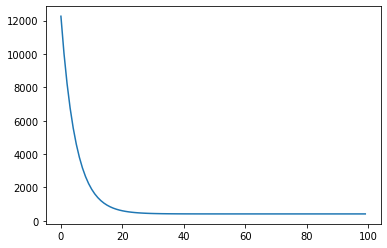

In [108]:
plt.plot(error_list)
plt.show()

In [109]:
theta

array([[29.59234868],
       [94.64766952],
       [ 8.37318663],
       [45.52116937],
       [ 2.46359567]])

In [116]:
y_test = hypothesis(X_test,theta)

In [117]:
def r2_score(y,Y_test):
    
    nu = np.sum((Y_test-y)**2)
    den = np.sum((y.mean()-y)**2)
    
    return np.round((1- nu/den)*100)

In [125]:
r2_score(y,y_pred)

96.0

In [1]:
df= pd.DataFrame(y_test,columns=['label'])

NameError: name 'pd' is not defined

In [2]:
df.head()

NameError: name 'df' is not defined

In [138]:
df.to_csv("./airpolution_prediction.csv")